In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Paths to training and testing data
train_data_dir = 'C:/Users/USER/Desktop/Emotion Recognition/datasets/face_dataset/train'
test_data_dir = 'C:/Users/USER/Desktop/Emotion Recognition/datasets/face_dataset/test'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
# Load pre-trained ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 emotion classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,640,391 (94.00 MB)

 Trainable params: 1,052,679 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [4]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10,  # Adjust epochs as needed
)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2120 - loss: 1.9065

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 1834s 2s/step - accuracy: 0.2120 - loss: 1.9064 - val_accuracy: 0.2485 - val_loss: 1.8056
Epoch 2/10
  1/897 ━━━━━━━━━━━━━━━━━━━━ 23:11 2s/step - accuracy: 0.1562 - loss: 1.9426

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1562 - loss: 1.9426 - val_accuracy: 0.0000e+00 - val_loss: 2.1279
Epoch 3/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 1808s 2s/step - accuracy: 0.2440 - loss: 1.8162 - val_accuracy: 0.2500 - val_loss: 1.8029
Epoch 4/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2188 - loss: 1.7921 - val_accuracy: 0.0000e+00 - val_loss: 2.2869
Epoch 5/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 1826s 2s/step - accuracy: 0.2458 - loss: 1.8141 - val_accuracy: 0.2494 - val_loss: 1.7984
Epoch 6/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2500 - loss: 1.7847 - val_accuracy: 0.0000e+00 - val_loss: 2.2561
Epoch 7/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 1823s 2s/step - accuracy: 0.2511 - loss: 1.8100 - val_accuracy: 0.2482 - val_loss: 1.7970
Epoch 8/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2500 - loss: 1.7464 - val_accuracy: 0.0000e+00 - val_loss: 2.2949
Epoch 9/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 1949s 2s/step - accuracy: 0.2485 - loss: 1.8069 - val

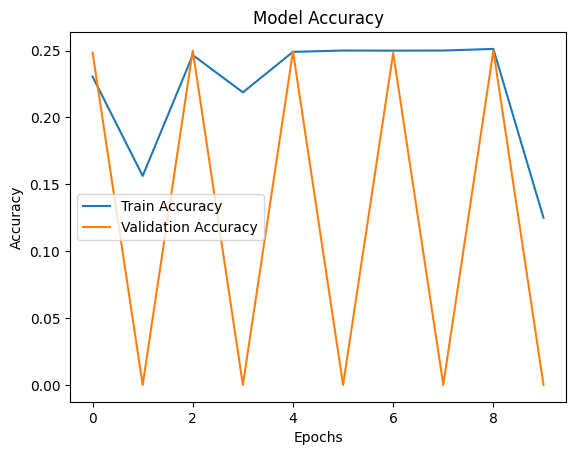

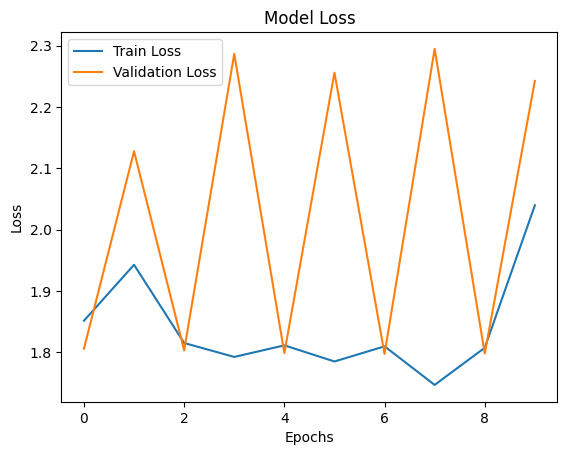

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()